#과제

- 'Student_Performance.csv'를 이용해 다중선형회귀분석을 진행하세요!


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
pip install statsmodels

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# 데이터 불러오기
student_performance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/와이빅타/Student_Performance.csv', index_col = 0)
student_performance

,Study_Hours,Prev_Scores,Sleep_Hours,Sample_Practice,PI,Extracurriculars
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0
...,...,...,...,...,...,...
9995,1,49,4,2,23.0,1
9996,7,64,8,5,58.0,1
9997,6,83,8,5,74.0,1
9998,9,97,7,0,95.0,1


2.1. 반응변수를 PI로 하고, 설명변수들을 그 외 모든 변수로 설정한 다중선형회귀분석을 진행하고 summary를 print하세요.

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
form_mod_sp = ols('PI ~ Study_Hours + Prev_Scores + Sleep_Hours + Sample_Practice + Extracurriculars', data = student_performance)
res2_sp = form_mod_sp.fit()

print(res2_sp.summary())

                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        04:57:17   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -34.0756      0.127  

2.2. 반응변수를 PI로 하고, 설명변수들을 Study_Hours로 설정한 단순선형회귀분석을 진행하고 summary를 print하세요.

In [17]:
form_mod_sp2 = ols('PI ~ Study_Hours', data = student_performance)
res2_sp2 = form_mod_sp2.fit()

print(res2_sp2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1623.
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        04:58:03   Log-Likelihood:                -42992.
No. Observations:               10000   AIC:                         8.599e+04
Df Residuals:                    9998   BIC:                         8.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      41.3792      0.387    106.890      

2.3. (2.1)과 (2.2)의 분석을 비교하고 Study_Hours와 PI의 관계를 짧게, 자유롭게 설명해보세요.

* 2.1의 결과
> - 다중선형회귀모델의 R-Squared 값은 0.989로 target 변수가 x값들로 인해 굉장히 잘 설명되고 있다고 할 수 있다
> - F value를 보았을 때 p-value가 0에 가까우므로 모델 자체가 통계적으로 유의미하다고 할 수 있다.
> - 모든 x변수들의 coefficient의 p-value가 0에 가까운 값으로, 모두 유의미하다는 것을 알 수 있다.
> - Durbin-Watson의 결과값이 2에 가까운 것을 보아, 해당 모델의 잔차항이 독립성을 충족한다고 할 수 있다.

* 2.2의 결과
> - 해당 단순회귀모델에서는 R-Squared 값이 0.14에 그쳐, Study_Hours만으로 target 변수 PI을 잘 설명하지 못함을 알 수 있다.
> - 하지만 이외의 F value, x변수의 coefficient, Durbin-Watson의 결과값 등은 2.1의 결과와 동일하게 나왔다.
> - 이를 통해 Study_Hours 변수는 Pl변수와 유의미한 관계를 가지며, 추가적으로 coefficient가 2.7731인 것을 보아 양의 상관성을 가짐을 알 수 있다.

[Optional!] 2.4. 자유롭게 산점도, 잔차도 등 여러 그림과 추가로 진행하고 싶은 진단들을 진행한 후 이 변수들을 이런 선형 모형의 가정에 만족하는 지 설명해주세요.

In [28]:
Y = student_performance['PI']
X_columns = list(student_performance.columns)
X_columns.remove('PI')
X = student_performance[X_columns]
X = sm.add_constant(X)

## 산점도 행렬 그리기 - 다중공선성 확인

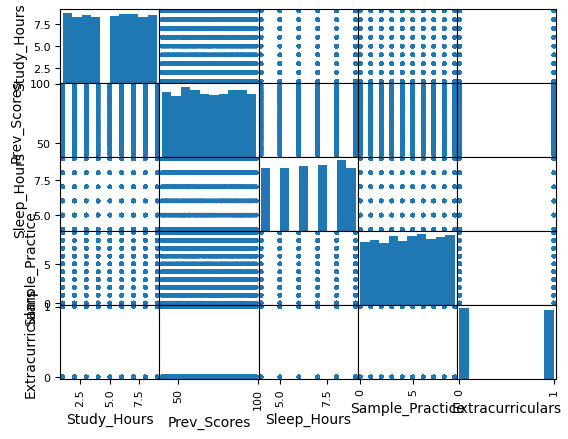

In [30]:
X_ = X.iloc[:, 1:]
pd.plotting.scatter_matrix(X_)
plt.show()

In [32]:
import seaborn as sns

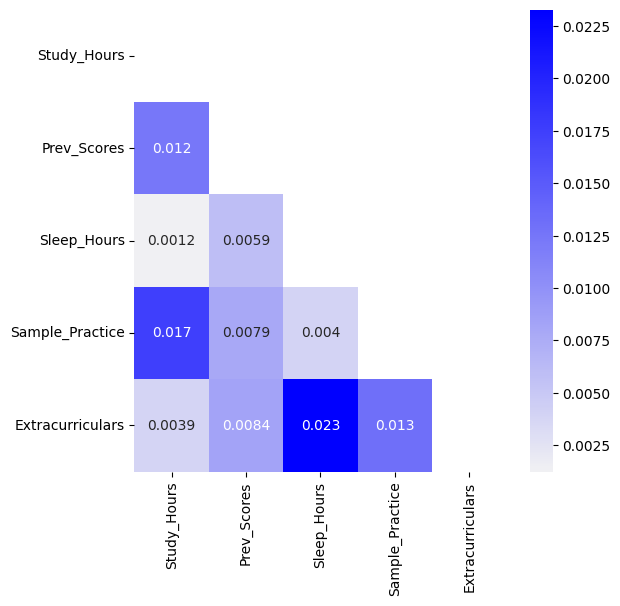

In [37]:
cmap = sns.light_palette("blue", as_cmap = True)
plt.figure(figsize=(6,6))
corr_matrix = student_performance[X_columns].corr()
abs_corr_matrix = np.abs(corr_matrix)

mask = np.zeros_like(abs_corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(abs_corr_matrix, annot = True, cmap = cmap, mask = mask)
plt.show()

In [36]:
def calc_vif(df):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(student_performance[X_columns])

,variables,VIF
0,Study_Hours,4.263244
1,Prev_Scores,10.088586
2,Sleep_Hours,9.833594
3,Sample_Practice,3.350481
4,Extracurriculars,1.928235


* 상관계수 행렬과 VIF 스코어를 보았을 떄, 모든 상관계수들이 0.1을 넘지 않아 충분히 서로 독립적임을 알 수 있다. 다만 Prev_Scores의 VIF 스코어가 10을 넘고, Sleep_Hours도 VIF 스코어가 10에 가까우므로 이 두 변수의 다중공선성을 의심해야 할 것이다.

## 일반 산점도 한꺼번에 그리기

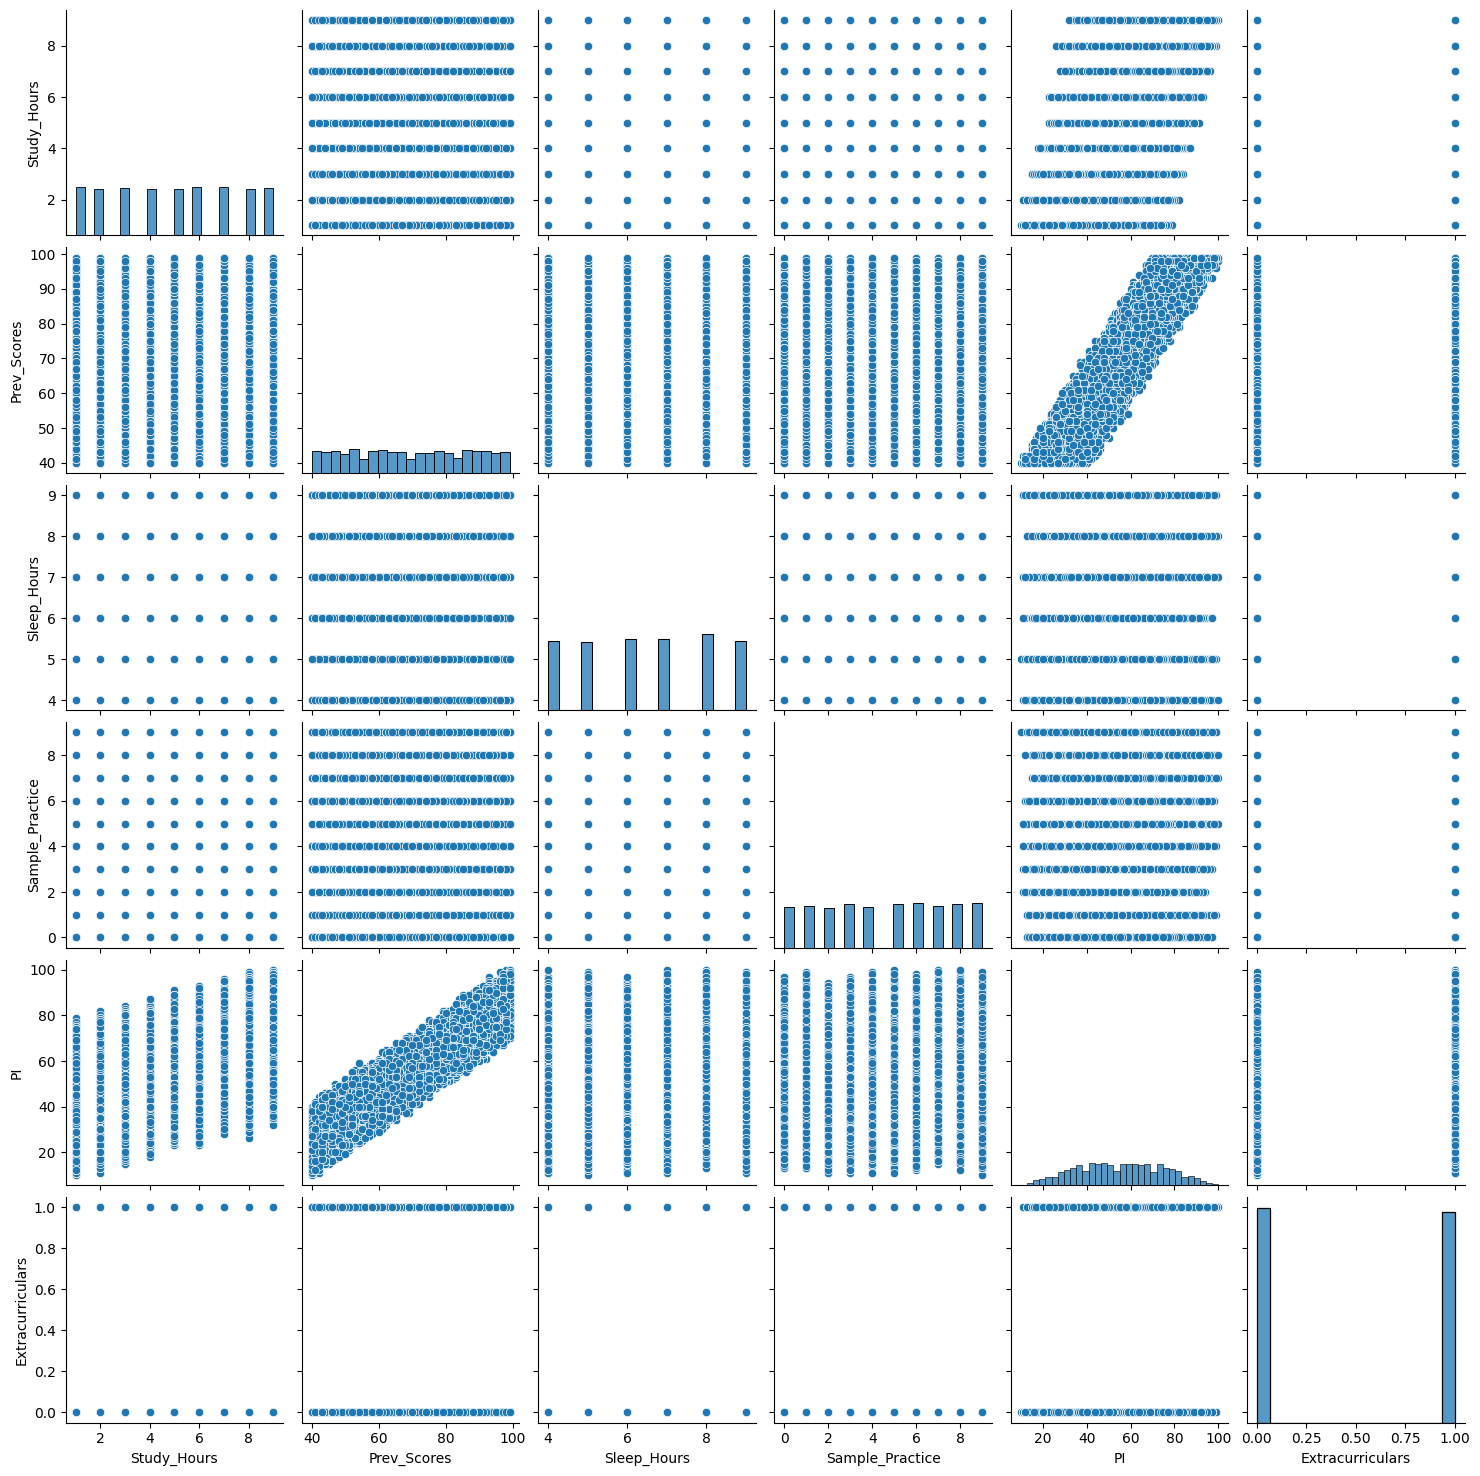

In [40]:
sns.pairplot(student_performance);

##잔차도 + 다른 여러 그림 그리기

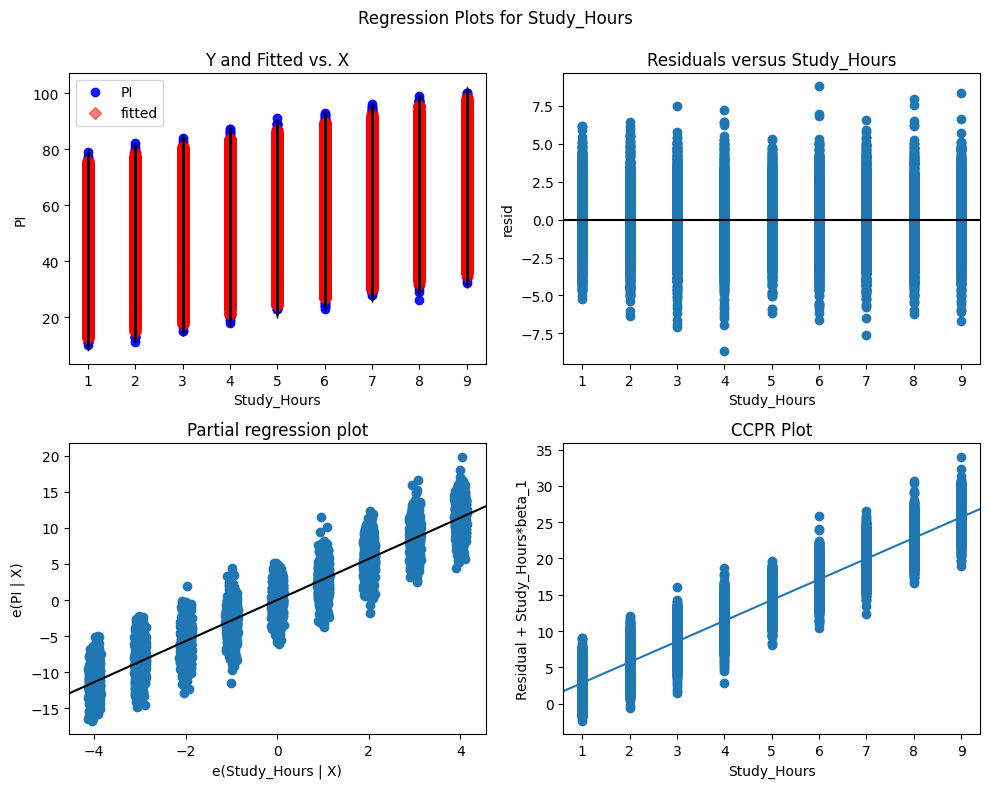

In [42]:
fig = plt.figure(figsize=(10, 8))
fig = sm.graphics.plot_regress_exog(form_mod_sp.fit(), 'Study_Hours', fig=fig)

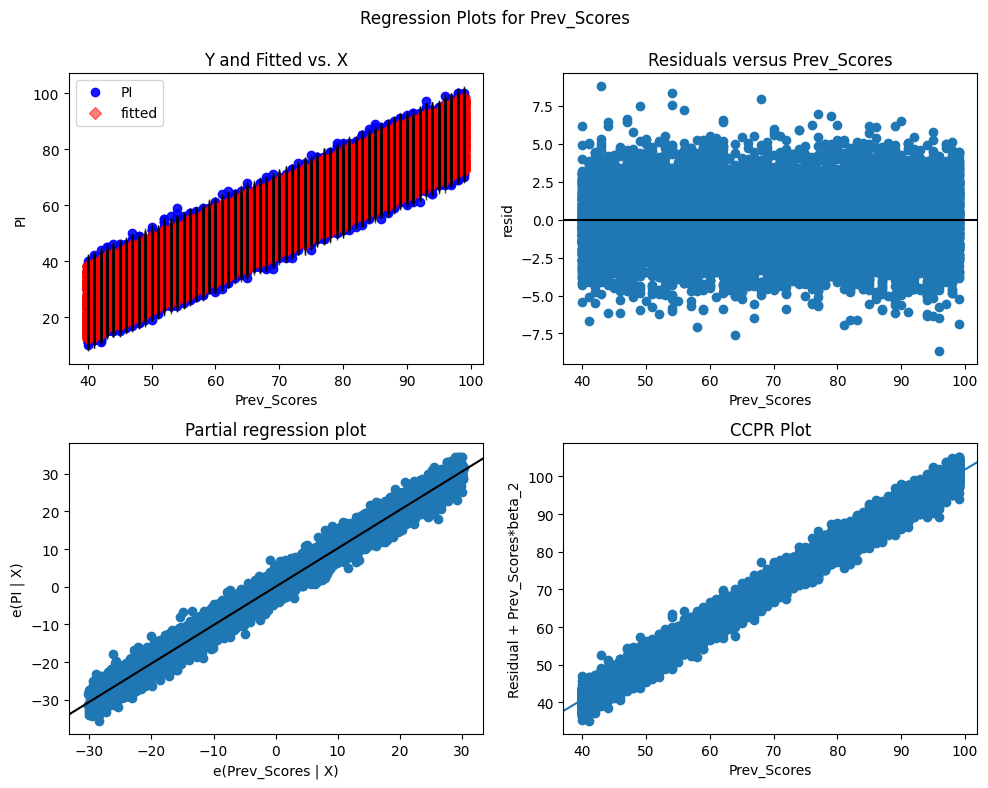

In [44]:
fig = plt.figure(figsize=(10, 8))
fig = sm.graphics.plot_regress_exog(form_mod_sp.fit(), 'Prev_Scores', fig=fig)

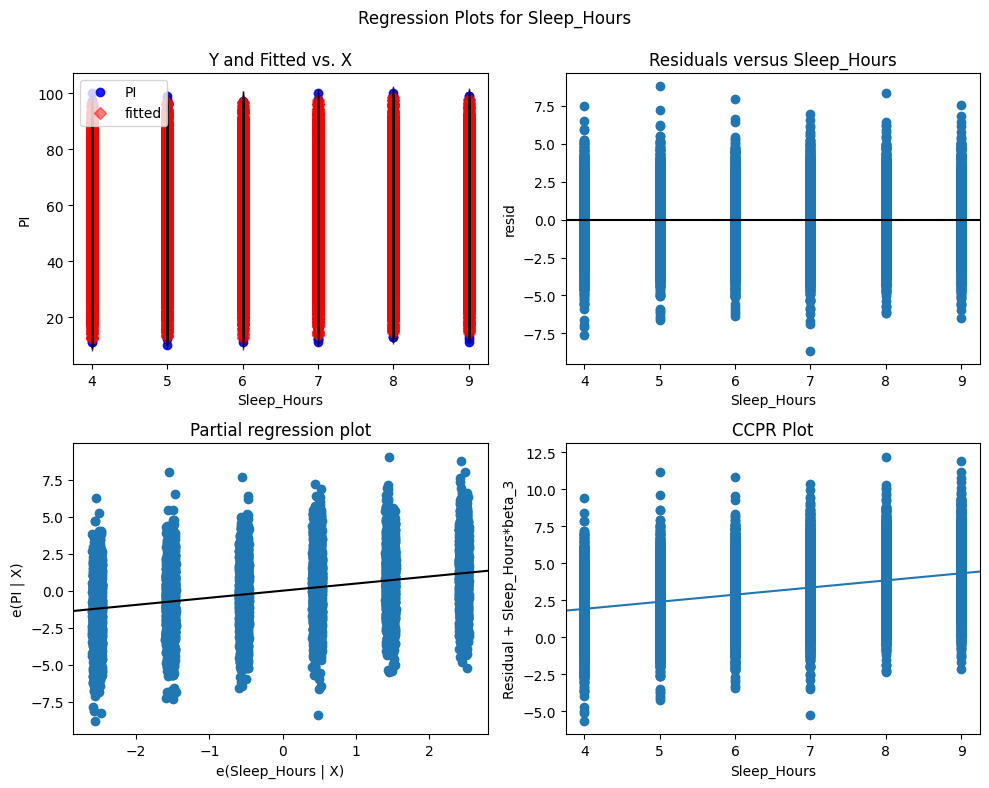

In [45]:
fig = plt.figure(figsize=(10, 8))
fig = sm.graphics.plot_regress_exog(form_mod_sp.fit(), 'Sleep_Hours', fig=fig)

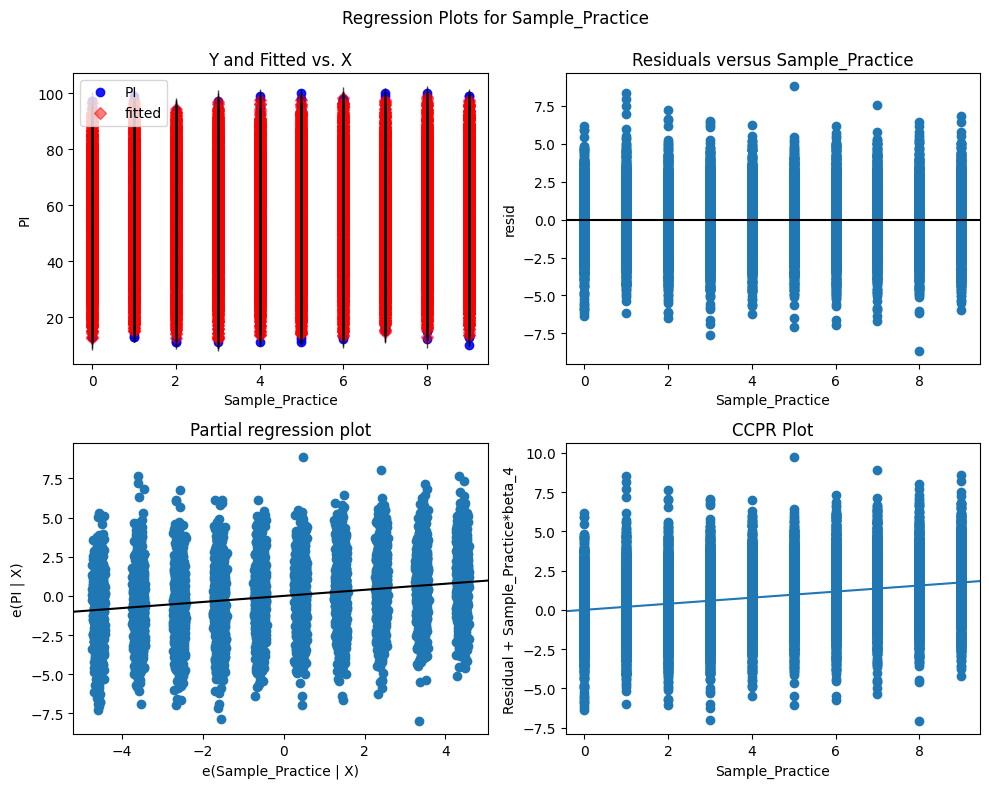

In [46]:
fig = plt.figure(figsize=(10, 8))
fig = sm.graphics.plot_regress_exog(form_mod_sp.fit(), 'Sample_Practice', fig=fig)

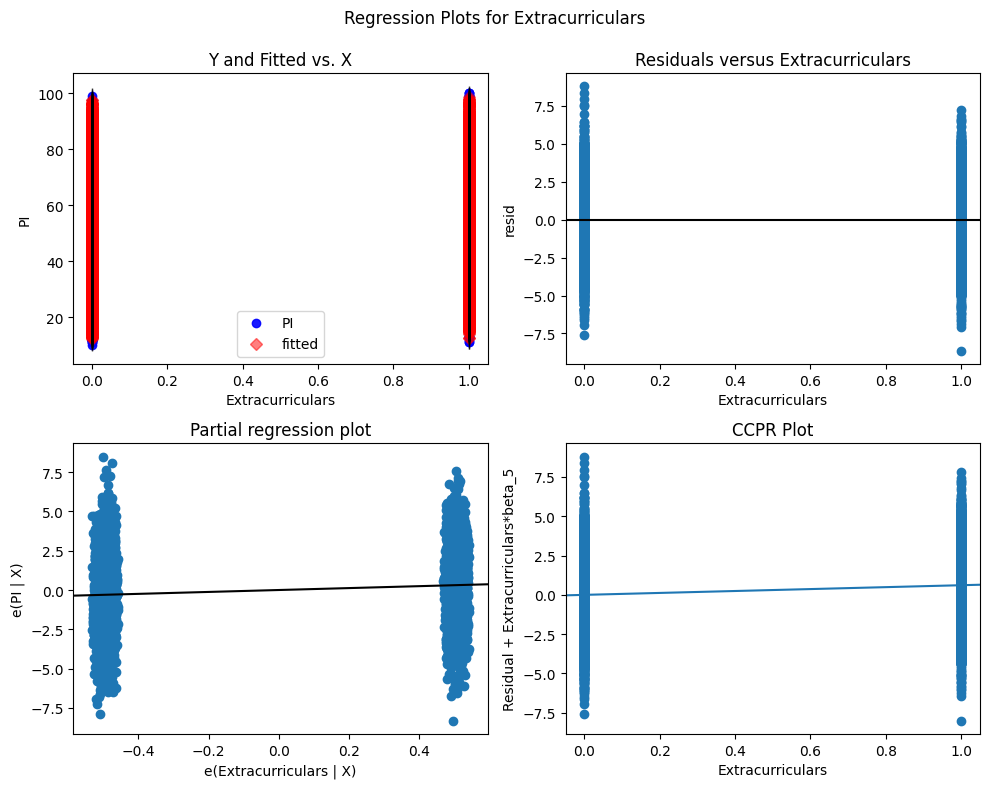

In [47]:
fig = plt.figure(figsize=(10, 8))
fig = sm.graphics.plot_regress_exog(form_mod_sp.fit(), 'Extracurriculars', fig=fig)

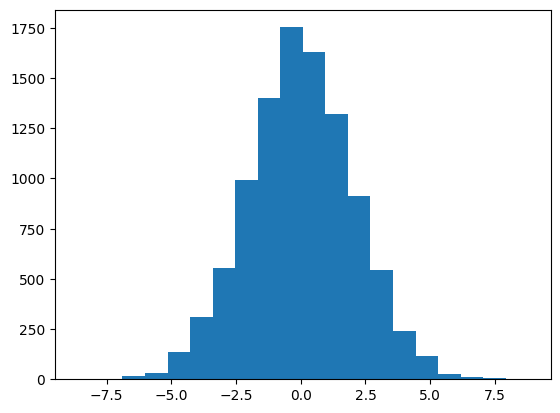

In [43]:
#잔차 히스토그램
residuals = Y - res2_sp.predict()
plt.hist(residuals, bins = 20)
plt.show()

* 잔차 히스토그램이 정규분포 형태를 가지므로, 오차항이 정규성을 만족한다고 할 수 있다.